<a href="https://colab.research.google.com/github/mohammedfahadnyc/CryptoProphet/blob/main/Crypto_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cryptocurrency Data Visualization and DogeCoin Price Prediction using Facebook Prophet : A Project For HACKIOWA hackathon 

##Task 1 : Importing all the necessary libraries

In [ ]:
import pandas as pd       #Data analysis and Manipulation
from fbprophet import Prophet # Bitcoin Price Prediction


In [ ]:
import plotly.offline as py           # create table
import plotly.graph_objs as go        #create candlestick charts             # Importing Plotly
import plotly.express as px           #create Violin plots, pie charts, box plot, scatter plots,line graph, area graph

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'     # To initialize plotly 

##Task 2 : Importing the dataset and analyzing it

In [ ]:
from google.colab import files
files.upload()

Saving AllCryptoData.csv to AllCryptoData.csv


{'AllCryptoData.csv': b'Date,Open,High,Low,Close,Adj Close,Volume,Currency Name\r\n2016-03-18,420.546997,420.546997,406.136993,409.548004,409.548004,104940000.0,Bitcoin\r\n2016-03-19,409.265015,410.98400900000000,407.230011,410.444,410.444,58423000.0,Bitcoin\r\n2016-03-20,410.40100100000000,414.625,410.40100100000000,413.755005,413.755005,45947900.0,Bitcoin\r\n2016-03-21,413.417999,413.417999,410.381012,413.307007,413.307007,61655400.0,Bitcoin\r\n2016-03-22,413.13198900000000,418.375,412.531006,418.088989,418.088989,66813300.0,Bitcoin\r\n2016-03-23,418.161011,419.26800500000000,417.364014,418.04098500000000,418.04098500000000,61444200.0,Bitcoin\r\n2016-03-24,418.424011,418.679993,415.485992,416.39401200000000,416.39401200000000,68346704.0,Bitcoin\r\n2016-03-25,416.507996,418.079987,415.558014,417.177002,417.177002,52560000.0,Bitcoin\r\n2016-03-26,417.36499,418.987,416.259003,417.945007,417.945007,44650400.0,Bitcoin\r\n2016-03-27,418.140015,428.796997,417.710999,426.76501500000000,426.7

In [ ]:
df = pd.read_csv('AllCryptoData.csv')

In [ ]:
df

Date        Open  ...        Volume  Currency Name
0      2016-03-18  420.546997  ...  1.049400e+08        Bitcoin
1      2016-03-19  409.265015  ...  5.842300e+07        Bitcoin
2      2016-03-20  410.401001  ...  4.594790e+07        Bitcoin
3      2016-03-21  413.417999  ...  6.165540e+07        Bitcoin
4      2016-03-22  413.131989  ...  6.681330e+07        Bitcoin
...           ...         ...  ...           ...            ...
22006  2021-04-14    0.094256  ...  2.097768e+10       Dogecoin
22007  2021-04-15    0.121167  ...  1.791662e+10       Dogecoin
22008  2021-04-16    0.181587  ...  6.941068e+10       Dogecoin
22009  2021-04-17    0.366098  ...  3.141340e+10       Dogecoin
22010  2021-04-18    0.290263  ...  2.668927e+10       Dogecoin

[22011 rows x 8 columns]

In [ ]:
#groupby
df.groupby(['Currency Name']).count()

Date  Open  High   Low  Close  Adj Close  Volume
Currency Name                                                  
Binance Coin   1360  1360  1360  1360   1360       1360    1360
Bitcoin        1854  1854  1854  1854   1854       1854    1854
Bitcoin Cash   1362  1362  1362  1362   1362       1362    1362
Cardano        1292  1292  1292  1292   1292       1292    1292
Chainlink      1303  1303  1303  1303   1303       1303    1303
Dash           1854  1854  1854  1854   1854       1854    1854
Dogecoin       2406  2402  2402  2402   2402       2402    2402
Ethereum       1854  1854  1854  1854   1854       1854    1854
Litecoin       1854  1854  1854  1854   1854       1854    1854
Ripple         1854  1854  1854  1854   1854       1854    1854
Stellar        1854  1854  1854  1854   1854       1854    1854
Tether         1854  1854  1854  1854   1854       1854    1854
Tron           1310  1310  1310  1310   1310       1310    1310

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22011 entries, 0 to 22010
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           22011 non-null  object 
 1   Open           22007 non-null  float64
 2   High           22007 non-null  float64
 3   Low            22007 non-null  float64
 4   Close          22007 non-null  float64
 5   Adj Close      22007 non-null  float64
 6   Volume         22007 non-null  float64
 7   Currency Name  22011 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.3+ MB


In [ ]:
df.describe()

Open          High  ...     Adj Close        Volume
count  22007.000000  22007.000000  ...  22007.000000  2.200700e+04
mean     819.226455    843.669148  ...    821.887956  4.099044e+09
std     3985.623238   4107.599872  ...   4003.553991  1.276322e+10
min        0.000087      0.000089  ...      0.000087  3.612000e+03
25%        0.071461      0.073981  ...      0.071708  3.596861e+07
50%        1.013800      1.038206  ...      1.015052  2.803477e+08
75%      130.857247    135.432907  ...    130.970451  1.977181e+09
max    63523.753906  64863.097656  ...  63503.457031  3.509679e+11

[8 rows x 6 columns]

##Task3: Data Visualization- All top Cruptcurrencies

### Table : Visualizing data 

In [ ]:
from plotly.figure_factory import create_table
table = create_table(df.tail(10), colorscale='blues')
py.iplot(table)

###Box plot : Analyzing volume

In [ ]:
px.box(df, x="Currency Name", y="Volume")

### Pie Chart : Analyzing volume

In [ ]:
px.pie(df, values="Volume", names="Currency Name")

###Violin Plot: Analyzing Price

In [ ]:
px.violin(df, x="Currency Name", y ="Adj Close")

In [ ]:
px.box(df, x="Currency Name", y ="Adj Close", log_y=True)

### Scatter Plots : Comparing between Currencies

In [ ]:
px.scatter(df,x="Close", y="Volume", hover_data=["High","Low","Date"], color="Currency Name", height=400)

In [ ]:
#with log function
px.scatter(df,x="Close", y="Volume", hover_data=["High","Low","Date"], color="Currency Name", height=400, log_x=True, log_y=True)

## Task 4 :Crypto Specific Financial Data Visualization- Dogecoin

In [ ]:
from google.colab import files
files.upload()

Saving DogecoinData.csv to DogecoinData.csv


{'DogecoinData.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600\n2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910\n2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563\n2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004\n2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140\n2014-09-22,0.000288,0.000301,0.000285,0.000298,0.000298,620222\n2014-09-23,0.000298,0.000318,0.000295,0.000313,0.000313,739197\n2014-09-24,0.000314,0.000353,0.000310,0.000348,0.000348,1277840\n2014-09-25,0.000347,0.000383,0.000332,0.000375,0.000375,2393610\n2014-09-26,0.000374,0.000467,0.000373,0.000451,0.000451,4722610\n2014-09-27,0.000450,0.000452,0.000359,0.000375,0.000375,2907080\n2014-09-28,0.000376,0.000414,0.000376,0.000392,0.000392,2115710\n2014-09-29,0.000394,0.000401,0.000378,0.000396,0.000396,1169070\n2014-09-30,0.000397,0.000408,0.000386,0.000399,0.000399,760341\n2014-10-01,0.000400,0.000406,0

In [ ]:
df_dogecoin = pd.read_csv("DogecoinData.csv")

In [ ]:
df_dogecoin

Date      Open      High  ...     Close  Adj Close        Volume
0     2014-09-17  0.000293  0.000299  ...  0.000268   0.000268  1.463600e+06
1     2014-09-18  0.000268  0.000325  ...  0.000298   0.000298  2.215910e+06
2     2014-09-19  0.000298  0.000307  ...  0.000277   0.000277  8.835630e+05
3     2014-09-20  0.000276  0.000310  ...  0.000292   0.000292  9.930040e+05
4     2014-09-21  0.000293  0.000299  ...  0.000288   0.000288  5.391400e+05
...          ...       ...       ...  ...       ...        ...           ...
2401  2021-04-14  0.094256  0.142510  ...  0.121517   0.121517  2.097768e+10
2402  2021-04-15  0.121167  0.187326  ...  0.182207   0.182207  1.791662e+10
2403  2021-04-16  0.181587  0.437700  ...  0.365870   0.365870  6.941068e+10
2404  2021-04-17  0.366098  0.374455  ...  0.284173   0.284173  3.141340e+10
2405  2021-04-18  0.290263  0.308171  ...  0.288736   0.288736  2.673752e+10

[2406 rows x 7 columns]

In [ ]:
#Dogecoin Area Graph using date and closing value
px.area(df_dogecoin,x="Date", y="Close", height=400, log_y=True)

In [ ]:
#Dogecoin Line Graph
px.line (df_dogecoin, x="Date", y="Volume", log_y=True)

In [ ]:
px.violin (df_dogecoin, y="Adj Close", height=300,width=1000)

In [ ]:
fig = go.Figure(go.Candlestick(x=df_dogecoin['Date'],
                               open=df_dogecoin['Open'],
                               close=df_dogecoin['Close'],
                               high=df_dogecoin['High'],
                               low=df_dogecoin['Low'],
                               ))

In [ ]:
fig.show()

# Dogecoin Prediction using Facebook Prophet

In [ ]:
"""Only LSTM and PROPHET are two recommended time series analysis tool for crypto prediction,however Prophet provides
 upper and lower bound so we are using prophet """

'Only LSTM and PROPHET are two recommended time series analysis tool for crypto prediction,however Prophet provides\n upper and lower bound so we are using prophet '

In [ ]:
# We have imported fb Prophet in the first task.

## Task 5:  Data Preperation

In [ ]:
#df_dogecoin

In [ ]:
#
#columns=["Date", "Close"]
#df1= pd.dataframe(df_dogecoin,columns=columns)

In [ ]:
from google.colab import files
files.upload()

Saving DogecoinDataforProphetCSV.csv to DogecoinDataforProphetCSV.csv


{'DogecoinDataforProphetCSV.csv': b'Date,Close\r\n2014-09-17,0.000268\r\n2014-09-18,0.000298\r\n2014-09-19,0.000277\r\n2014-09-20,0.000292\r\n2014-09-21,0.000288\r\n2014-09-22,0.000298\r\n2014-09-23,0.000313\r\n2014-09-24,0.000348\r\n2014-09-25,0.000375\r\n2014-09-26,0.000451\r\n2014-09-27,0.000375\r\n2014-09-28,0.000392\r\n2014-09-29,0.000396\r\n2014-09-30,0.000399\r\n2014-10-01,0.000371\r\n2014-10-02,0.000334\r\n2014-10-03,0.000326\r\n2014-10-04,0.000300\r\n2014-10-05,0.000273\r\n2014-10-06,0.000298\r\n2014-10-07,0.000297\r\n2014-10-08,0.000294\r\n2014-10-09,0.000293\r\n2014-10-10,0.000271\r\n2014-10-11,0.000278\r\n2014-10-12,0.000290\r\n2014-10-13,0.000285\r\n2014-10-14,0.000285\r\n2014-10-15,0.000268\r\n2014-10-16,0.000258\r\n2014-10-17,0.000250\r\n2014-10-18,0.000257\r\n2014-10-19,0.000244\r\n2014-10-20,0.000232\r\n2014-10-21,0.000230\r\n2014-10-22,0.000256\r\n2014-10-23,0.000245\r\n2014-10-24,0.000251\r\n2014-10-25,0.000246\r\n2014-10-26,0.000249\r\n2014-10-27,0.000251\r\n2014-10

In [ ]:
df_dogepredict2=pd.read_csv("DogecoinDataforProphetCSV.csv")
df_dogepredict2

Date     Close
0     2014-09-17  0.000268
1     2014-09-18  0.000298
2     2014-09-19  0.000277
3     2014-09-20  0.000292
4     2014-09-21  0.000288
...          ...       ...
2401  2021-04-14  0.121517
2402  2021-04-15  0.182207
2403  2021-04-16  0.365870
2404  2021-04-17  0.284173
2405  2021-04-18  0.288736

[2406 rows x 2 columns]

In [ ]:
prophet_df1 = df_dogepredict2.rename(columns={'Date':"ds", 'Close':"y"})

In [ ]:
prophet_df1

ds         y
0     2014-09-17  0.000268
1     2014-09-18  0.000298
2     2014-09-19  0.000277
3     2014-09-20  0.000292
4     2014-09-21  0.000288
...          ...       ...
2401  2021-04-14  0.121517
2402  2021-04-15  0.182207
2403  2021-04-16  0.365870
2404  2021-04-17  0.284173
2405  2021-04-18  0.288736

[2406 rows x 2 columns]

## Task 6: Modelling

In [ ]:
m2=Prophet(daily_seasonality=True) 

In [ ]:
m2.fit(prophet_df1)

##Task 7: Forecasting

In [ ]:
future = m2.make_future_dataframe(periods=30)

In [ ]:
future

ds
0    2014-09-17
1    2014-09-18
2    2014-09-19
3    2014-09-20
4    2014-09-21
...         ...
2431 2021-05-14
2432 2021-05-15
2433 2021-05-16
2434 2021-05-17
2435 2021-05-18

[2436 rows x 1 columns]

In [ ]:
forecast = m.predict(future)


In [ ]:
forecast

ds     trend  ...  multiplicative_terms_upper      yhat
0    2014-09-17  0.002054  ...                         0.0  0.000150
1    2014-09-18  0.002038  ...                         0.0  0.000279
2    2014-09-19  0.002022  ...                         0.0  0.000835
3    2014-09-20  0.002006  ...                         0.0  0.000399
4    2014-09-21  0.001989  ...                         0.0  0.000355
...         ...       ...  ...                         ...       ...
2431 2021-05-14  0.040618  ...                         0.0  0.038789
2432 2021-05-15  0.040712  ...                         0.0  0.038757
2433 2021-05-16  0.040807  ...                         0.0  0.039166
2434 2021-05-17  0.040901  ...                         0.0  0.038830
2435 2021-05-18  0.040995  ...                         0.0  0.039184

[2436 rows x 19 columns]

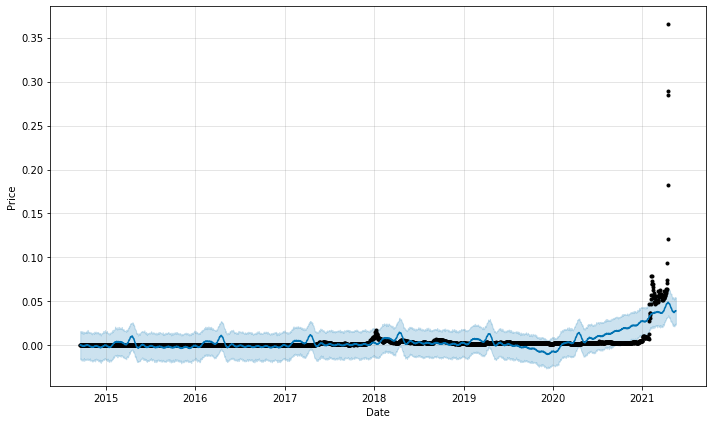

In [ ]:
figure = m.plot(forecast, xlabel="Date", ylabel='Price', )

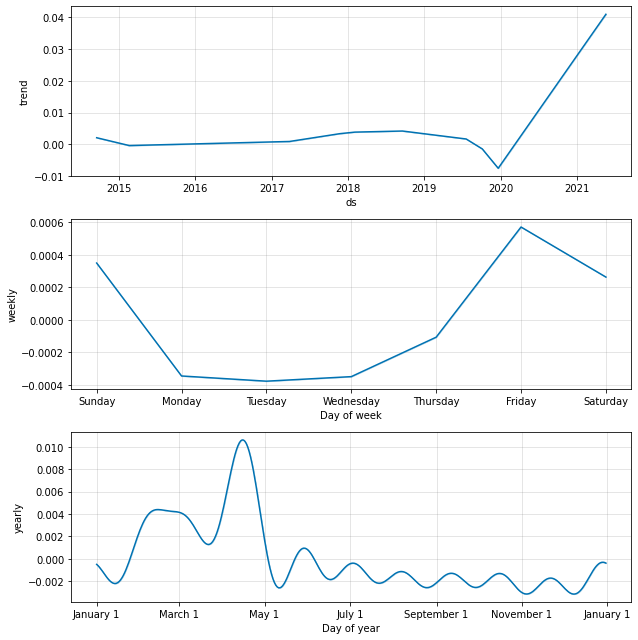

In [ ]:
figure2= m.plot_components(forecast)

##Task 8: Downloading the Forecast data

In [ ]:
forecast.to_csv('forecast.csv')

In [ ]:
from google.colab import files

In [ ]:
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>